## Domestic Violence Related Calls Analysis

This notebook explores patterns in domestic violence related calls for assistance across California. The goal is to identify trends and questions that will help build a predictive model in the future.

**Curiosities:**
- When do DV calls happen most often? (year, month, day)
- Where do calls cluster geographically?
- What types of incidents are most reported?
- Who is affected, and how do outcomes vary?

**Considerations:**
- Data quality and missingness
- Anonymization and privacy limits
- Changing reporting practices over time

**Next Steps:**
- Visualize call trends by time and location
- Highlight types of calls and outcomes
- Identify repeat call patterns
- Suggest potential predictive targets (e.g., predicting escalation, repeat calls, or need for services)


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Domestic violence Data.csv')

# Quick look at shape and columns
print("Shape:", df.shape)
display(df.head())
display(df.info())


Shape: (190445, 14)


,YEAR,COUNTY,AGENCY_NAME,MONTH,TOTAL_CALLS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
0,2001,Alameda County,Alameda,4,15,15,0,0,1,14,0,NaN,NaN,NaN
1,2001,Alameda County,Alameda,6,14,14,0,0,1,13,0,NaN,NaN,NaN
2,2001,Alameda County,Alameda,10,19,19,0,0,0,19,0,NaN,NaN,NaN
3,2001,Alameda County,Alameda,12,21,21,0,0,0,21,0,NaN,NaN,NaN
4,2001,Alameda County,Alameda,5,19,19,0,0,0,19,0,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190445 entries, 0 to 190444
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                190445 non-null  int64  
 1   COUNTY              190445 non-null  object 
 2   AGENCY_NAME         190445 non-null  object 
 3   MONTH               190445 non-null  int64  
 4   TOTAL_CALLS         190445 non-null  int64  
 5   WEAPONS_INVOLVED    190445 non-null  int64  
 6   SUB_FIREARM         190445 non-null  int64  
 7   SUB_KNIFE           190445 non-null  int64  
 8   SUB_OTHER           190445 non-null  int64  
 9   SUB_PERSONAL        190445 non-null  int64  
 10  WEAPON_NOT_RPT      190445 non-null  int64  
 11  TOTAL_STRANG_SUFFO  50049 non-null   float64
 12  SUB_STRANGULATION   50049 non-null   float64
 13  SUB_SUFFOCATION     50049 non-null   float64
dtypes: float64(3), int64(9), object(2)
memory usage: 20.3+ MB


None

In [3]:
# Count missing values by column
missing = df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("Columns with missing values:\n", missing)
else:
    print("No missing values detected.")


Columns with missing values:
 TOTAL_STRANG_SUFFO    140396
SUB_STRANGULATION     140396
SUB_SUFFOCATION       140396
dtype: int64


In [4]:
# Get numeric summary
display(df.describe())

# Show value counts for key categorical columns (replace with your actual column names)
for col in ['COUNTY', 'CITY', 'CALL_TYPE', 'OUTCOME']:
    if col in df.columns:
        print(f"\nTop values in {col}:")
        print(df[col].value_counts().head(10))


,YEAR,MONTH,TOTAL_CALLS,WEAPONS_INVOLVED,SUB_FIREARM,SUB_KNIFE,SUB_OTHER,SUB_PERSONAL,WEAPON_NOT_RPT,TOTAL_STRANG_SUFFO,SUB_STRANGULATION,SUB_SUFFOCATION
count,190445.000000,190445.000000,190445.000000,190445.000000,190445.000000,190445.000000,190445.000000,190445.000000,190445.000000,50049.000000,50049.000000,50049.000000
mean,2012.112841,6.489280,20.495046,9.790737,0.156040,0.409525,1.420636,7.804516,0.000021,1.079202,0.956163,0.126236
std,6.608809,3.462291,79.616801,57.755141,1.335849,2.463112,8.601595,46.774262,0.004583,6.395250,6.146281,1.077596
min,2001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,10.000000,17.000000,5.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,2023.000000,12.000000,3295.000000,2380.000000,146.000000,113.000000,435.000000,1886.000000,1.000000,195.000000,185.000000,187.000000



Top values in COUNTY:
COUNTY
Los Angeles County       27155
Orange County            11067
Riverside County          8720
San Bernardino County     8547
San Diego County          7312
Contra Costa County       6730
Santa Clara County        6021
San Mateo County          5887
Alameda County            5752
Fresno County             5301
Name: count, dtype: int64


In [5]:
# Convert date/time if available
if 'DATE' in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month
    df['DAYOFWEEK'] = df['DATE'].dt.dayofweek
    display(df[['DATE','YEAR','MONTH','DAYOFWEEK']].head())


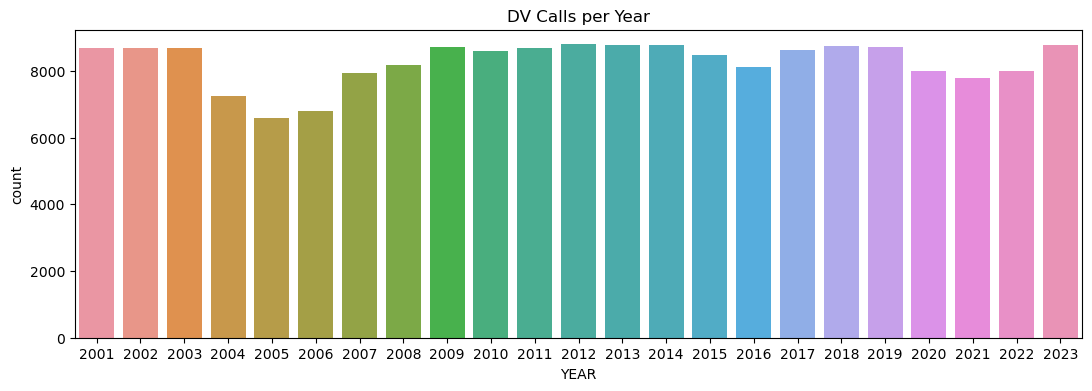

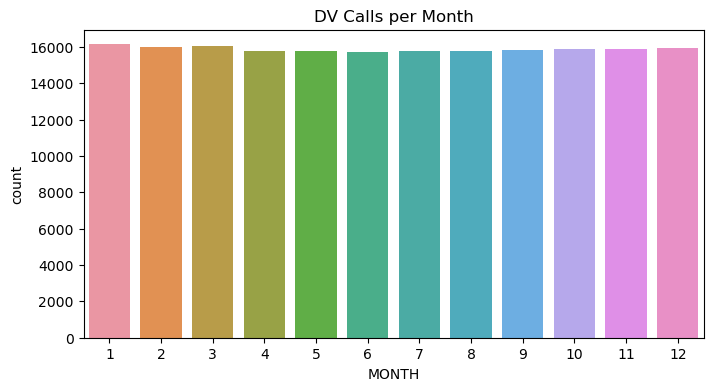

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# By year
if 'YEAR' in df.columns:
    plt.figure(figsize=(13,4))
    sns.countplot(x='YEAR', data=df, order=sorted(df['YEAR'].dropna().unique()))
    plt.title('DV Calls per Year')
    plt.show()

# By month
if 'MONTH' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='MONTH', data=df, order=range(1,13))
    plt.title('DV Calls per Month')
    plt.show()


In [9]:
if 'DAYOFWEEK' in df.columns:
    plt.figure(figsize=(8,4))
    days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    sns.countplot(x='DAYOFWEEK', data=df)
    plt.xticks(ticks=range(7), labels=days)
    plt.title('DV Calls by Day of Week')
    plt.show()


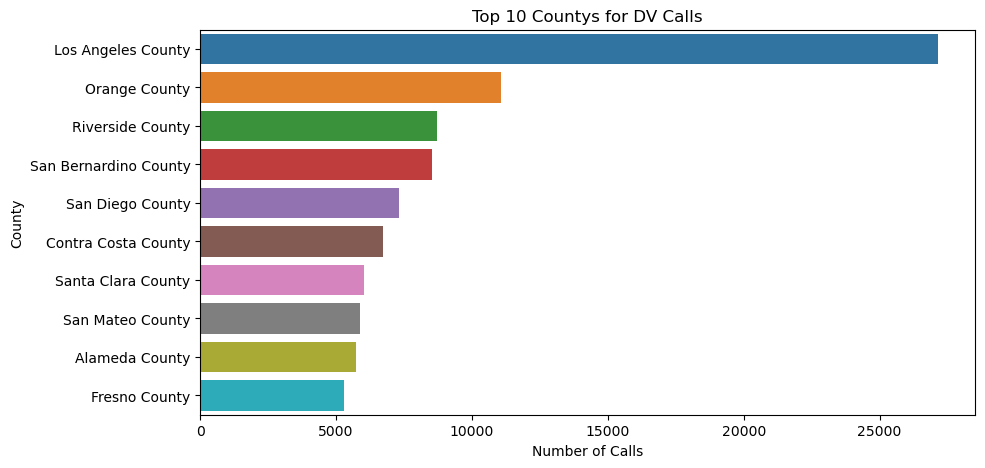

In [10]:
# Top locations
for loc_col in ['COUNTY', 'CITY']:
    if loc_col in df.columns:
        plt.figure(figsize=(10,5))
        top_locs = df[loc_col].value_counts().head(10)
        sns.barplot(y=top_locs.index, x=top_locs.values)
        plt.title(f'Top 10 {loc_col.title()}s for DV Calls')
        plt.xlabel('Number of Calls')
        plt.ylabel(loc_col.title())
        plt.show()


In [15]:
# Call type
if 'CALL_TYPE' in df.columns:
    plt.figure(figsize=(10,5))
    top_types = df['CALL_TYPE'].value_counts().head(10)
    sns.barplot(y=top_types.index, x=top_types.values)
    plt.title('Top 10 Types of DV Calls')
    plt.xlabel('Number of Calls')
    plt.ylabel('Call Type')
    plt.show()


# Outcome
if 'OUTCOME' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y='OUTCOME', data=df, order=df['OUTCOME'].value_counts().index)
    plt.title('Outcomes of DV Calls')
    plt.xlabel('Count')
    plt.ylabel('Outcome')
    plt.show()


CALL_TYPE column not found.


In [14]:
print(df.columns.tolist())


['YEAR', 'COUNTY', 'AGENCY_NAME', 'MONTH', 'TOTAL_CALLS', 'WEAPONS_INVOLVED', 'SUB_FIREARM', 'SUB_KNIFE', 'SUB_OTHER', 'SUB_PERSONAL', 'WEAPON_NOT_RPT', 'TOTAL_STRANG_SUFFO', 'SUB_STRANGULATION', 'SUB_SUFFOCATION']
